In [1]:
import pandas as pd 
import patsy
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from feature_model import FeatureModel
import contextlib

In [2]:
from ce2_compare import compare, set_name, write_submission_txt, set_idm

In [3]:
set_name("Changhun", "Kim")
set_idm("no12neni")

# CE2 (Inherently explainable models part 2)
    - Taking a look at new data: The cervical cancer dataset
    - Logistic regression
    - Decision Trees 
    - RuleFit


## The cervical cancer dataset

In [4]:
cv_cancer_path = "datasets/cervical_cancer/risk_factors_cervical_cancer_pre.csv"
cv_data = FeatureModel(cv_cancer_path)

In [5]:
cv_data.df

Age  Number_of_sexual_partners  First_sexual_intercourse  \
0    18.0                        4.0                      15.0   
1    15.0                        1.0                      14.0   
2    34.0                        1.0                      15.0   
3    52.0                        5.0                      16.0   
4    46.0                        3.0                      21.0   
..    ...                        ...                       ...   
853  34.0                        3.0                      18.0   
854  32.0                        2.0                      19.0   
855  25.0                        2.0                      17.0   
856  33.0                        2.0                      24.0   
857  29.0                        2.0                      20.0   

     Num_of_pregnancies  Smokes  Smokes__years  Hormonal_Contraceptives  \
0                   1.0     0.0            0.0                      0.0   
1                   1.0     0.0            0.0                      0.0   
2                   1.0     0.0            0.0                      0.0   
3                   4.0     1.0           37.0                      1.0   
4                   4.0     0.0            0.0                      1.0   
..                  ...     ...            ...                      ...   
853                 0.0     0.0            0.0                      0.0   
854                 1.0     0.0            0.0                      1.0   
855                 0.0     0.0            0.0                      1.0   
856                 2.0     0.0            0.0                      1.0   
857                 1.0     0.0            0.0                      1.0   

     Hormonal_Contraceptives__years  IUD  IUD__years  STDs  \
0                              0.00  0.0         0.0   0.0   
1                              0.00  0.0         0.0   0.0   
2                              0.00  0.0         0.0   0.0   
3                              3.00  0.0         0.0   0.0   
4                             15.00  0.0         0.0   0.0   
..                              ...  ...         ...   ...   
853                            0.00  0.0         0.0   0.0   
854                            8.00  0.0         0.0   0.0   
855                            0.08  0.0         0.0   0.0   
856                            0.08  0.0         0.0   0.0   
857                            0.50  0.0         0.0   0.0   

     STDs__Number_of_diagnosis  STDs__Time_since_first_diagnosis  \
0                          0.0                               1.0   
1                          0.0                               1.0   
2                          0.0                               1.0   
3                          0.0                               1.0   
4                          0.0                               1.0   
..                         ...                               ...   
853                        0.0                               1.0   
854                        0.0                               1.0   
855                        0.0                               1.0   
856                        0.0                               1.0   
857                        0.0                               1.0   

     STDs__Time_since_last_diagnosis  Biopsy  
0                                1.0     0.0  
1                                1.0     0.0  
2                                1.0     0.0  
3                                1.0     0.0  
4                                1.0     0.0  
..                               ...     ...  
853                              1.0     0.0  
854                              1.0     0.0  
855                              1.0     0.0  
856                              1.0     0.0  
857                              1.0     0.0  

[858 rows x 15 columns]

#### Let's check out the `readme.txt` to find out what all these columns represent

In [6]:
cv_data.add_target("Biopsy")
cv_data.add_all_features_but_target()


FeatureModel(->Not fully specified yet!)
FeatureModel(Biopsy ~ -1 + Age + Number_of_sexual_partners + First_sexual_intercourse + Num_of_pregnancies + Smokes + Smokes__years + Hormonal_Contraceptives + Hormonal_Contraceptives__years + IUD + IUD__years + STDs + STDs__Number_of_diagnosis + STDs__Time_since_first_diagnosis + STDs__Time_since_last_diagnosis )


In [7]:
X, y = cv_data.return_Xy()

In [8]:
X

Age  Number_of_sexual_partners  First_sexual_intercourse  \
0    18.0                        4.0                      15.0   
1    15.0                        1.0                      14.0   
2    34.0                        1.0                      15.0   
3    52.0                        5.0                      16.0   
4    46.0                        3.0                      21.0   
..    ...                        ...                       ...   
853  34.0                        3.0                      18.0   
854  32.0                        2.0                      19.0   
855  25.0                        2.0                      17.0   
856  33.0                        2.0                      24.0   
857  29.0                        2.0                      20.0   

     Num_of_pregnancies  Smokes  Smokes__years  Hormonal_Contraceptives  \
0                   1.0     0.0            0.0                      0.0   
1                   1.0     0.0            0.0                      0.0   
2                   1.0     0.0            0.0                      0.0   
3                   4.0     1.0           37.0                      1.0   
4                   4.0     0.0            0.0                      1.0   
..                  ...     ...            ...                      ...   
853                 0.0     0.0            0.0                      0.0   
854                 1.0     0.0            0.0                      1.0   
855                 0.0     0.0            0.0                      1.0   
856                 2.0     0.0            0.0                      1.0   
857                 1.0     0.0            0.0                      1.0   

     Hormonal_Contraceptives__years  IUD  IUD__years  STDs  \
0                              0.00  0.0         0.0   0.0   
1                              0.00  0.0         0.0   0.0   
2                              0.00  0.0         0.0   0.0   
3                              3.00  0.0         0.0   0.0   
4                             15.00  0.0         0.0   0.0   
..                              ...  ...         ...   ...   
853                            0.00  0.0         0.0   0.0   
854                            8.00  0.0         0.0   0.0   
855                            0.08  0.0         0.0   0.0   
856                            0.08  0.0         0.0   0.0   
857                            0.50  0.0         0.0   0.0   

     STDs__Number_of_diagnosis  STDs__Time_since_first_diagnosis  \
0                          0.0                               1.0   
1                          0.0                               1.0   
2                          0.0                               1.0   
3                          0.0                               1.0   
4                          0.0                               1.0   
..                         ...                               ...   
853                        0.0                               1.0   
854                        0.0                               1.0   
855                        0.0                               1.0   
856                        0.0                               1.0   
857                        0.0                               1.0   

     STDs__Time_since_last_diagnosis  
0                                1.0  
1                                1.0  
2                                1.0  
3                                1.0  
4                                1.0  
..                               ...  
853                              1.0  
854                              1.0  
855                              1.0  
856                              1.0  
857                              1.0  

[858 rows x 14 columns]

What is the percentage of people that did have cancer?

In [9]:
y.mean()

Biopsy    0.064103
dtype: float64

### Splitting into test- and training-data

In [10]:
X_train, y_train, X_val, y_val = cv_data.return_Xy(train_test_split=True)

In [11]:
X_train

Age  Number_of_sexual_partners  First_sexual_intercourse  \
408  17.0                        2.0                      15.0   
207  26.0                        3.0                      18.0   
61   35.0                        3.0                      20.0   
455  18.0                        1.0                      16.0   
331  27.0                        1.0                      15.0   
..    ...                        ...                       ...   
715  15.0                        2.0                      14.0   
767  15.0                        2.0                      13.0   
72   34.0                        2.0                      21.0   
235  25.0                        2.0                      17.0   
37   37.0                        2.0                      18.0   

     Num_of_pregnancies  Smokes  Smokes__years  Hormonal_Contraceptives  \
408                 2.0     0.0            0.0                      1.0   
207                 2.0     0.0            0.0                      1.0   
61                  5.0     1.0           19.0                      1.0   
455                 2.0     0.0            0.0                      0.0   
331                 4.0     0.0            0.0                      1.0   
..                  ...     ...            ...                      ...   
715                 1.0     0.0            0.0                      0.0   
767                 1.0     0.0            0.0                      1.0   
72                  2.0     0.0            0.0                      1.0   
235                 1.0     0.0            0.0                      1.0   
37                  1.0     0.0            0.0                      1.0   

     Hormonal_Contraceptives__years  IUD  IUD__years  STDs  \
408                        0.000000  0.0         0.0   0.0   
207                        1.000000  0.0         0.0   0.0   
61                         4.000000  0.0         0.0   0.0   
455                        0.000000  0.0         0.0   1.0   
331                        2.282201  1.0         5.0   0.0   
..                              ...  ...         ...   ...   
715                        0.000000  0.0         0.0   0.0   
767                        0.000000  0.0         0.0   0.0   
72                         0.330000  0.0         0.0   0.0   
235                        0.500000  0.0         0.0   0.0   
37                         0.580000  0.0         0.0   0.0   

     STDs__Number_of_diagnosis  STDs__Time_since_first_diagnosis  \
408                        0.0                               1.0   
207                        0.0                               1.0   
61                         0.0                               1.0   
455                        0.0                               1.0   
331                        0.0                               1.0   
..                         ...                               ...   
715                        0.0                               1.0   
767                        0.0                               1.0   
72                         0.0                               1.0   
235                        0.0                               1.0   
37                         0.0                               1.0   

     STDs__Time_since_last_diagnosis  
408                              1.0  
207                              1.0  
61                               1.0  
455                              1.0  
331                              1.0  
..                               ...  
715                              1.0  
767                              1.0  
72                               1.0  
235                              1.0  
37                               1.0  

[686 rows x 14 columns]

## Logistic regression 

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1, max_iter=1000)
clf.fit(X_train, y_train)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=1)

In [13]:
clf.score(X_val, y_val)

0.9302325581395349

Q: What do think of this accuracy / Is there maybe an issue regarding the distribution of target-values?

In [16]:
X_val.iloc[0]

Age                                 25.00
Number_of_sexual_partners            2.00
First_sexual_intercourse            18.00
Num_of_pregnancies                   2.00
Smokes                               0.00
Smokes__years                        0.00
Hormonal_Contraceptives              1.00
Hormonal_Contraceptives__years       0.25
IUD                                  0.00
IUD__years                           0.00
STDs                                 0.00
STDs__Number_of_diagnosis            0.00
STDs__Time_since_first_diagnosis     1.00
STDs__Time_since_last_diagnosis      1.00
Name: 255, dtype: float64

In [17]:
clf.predict(X_val.iloc[0:1])

array([0.])

In [18]:
clf.predict_proba(X_val.iloc[0:1])

array([[0.96604472, 0.03395528]])

### Exercise 2.1
Using the above `Logistic regression` classifier, by what factor does the odds-ratio of having cancer over not having cancer increase for every additional diagnosed STD?

In [47]:
feature_names = X.columns
std_coef = clf.coef_[0][list(feature_names).index('STDs__Number_of_diagnosis')]

In [49]:
list(feature_names).index('STDs__Number_of_diagnosis')

11

In [50]:
def ex_2_1() -> float : 
    feature_names = X.columns
    std_coef = clf.coef_[0][list(feature_names).index('STDs__Number_of_diagnosis')]
    return np.exp(std_coef)


In [51]:
compare("ex_2_1", ex_2_1)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


### Exercise 2.2
What is the odds-ratio of having cancer over not having cancer if every feature is at a value of zero?

In [57]:
def ex_2_2() -> float:
    return np.exp(clf.intercept_)


In [58]:
compare("ex_2_2", ex_2_2)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


## Decision/Rule Tree (using e.g. CART)

In [59]:
def ex_2_3(random_number_feature=False):
    with contextlib.redirect_stdout(None):
        bike_path = "datasets/bike/rented_bikes_day_pre.csv"
        bike_data = FeatureModel(bike_path)
        bike_data.add_target("cnt")
        bike_data.add_feature("days_since_01_01_2011")
        bike_data.add_feature("season")
        bike_data.add_feature("holiday")
        bike_data.add_feature("weekday")
        bike_data.add_feature("workingday")
        bike_data.add_feature("temp")
        bike_data.add_feature("hum")
        bike_data.add_feature("windspeed")
        
        if random_number_feature:
            np.random.seed(1)
            def random_number(temp):
                #TODO
                return np.random.normal(loc=0.0, scale=1.0, size=temp.shape)
            bike_data.add_function_feature(random_number, "temp",)
    
    return bike_data.return_Xy(train_test_split=True)

### Exercise 2.3
Add the following functionality to the existing `ex_2_3`. If `random_number_feature`=True, then each sample should have an addtional feature that is completely random and normally-distributed

In [60]:
compare("ex_2_3", ex_2_3)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


In [61]:
X_train, y_train, X_val, y_val = ex_2_3()

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
regr = DecisionTreeRegressor(max_depth=4, random_state=1) 
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=1)

In [64]:
regr.score(X_train, y_train)

0.8403245504298114

In [65]:
regr.score(X_val, y_val)

0.781209554274606

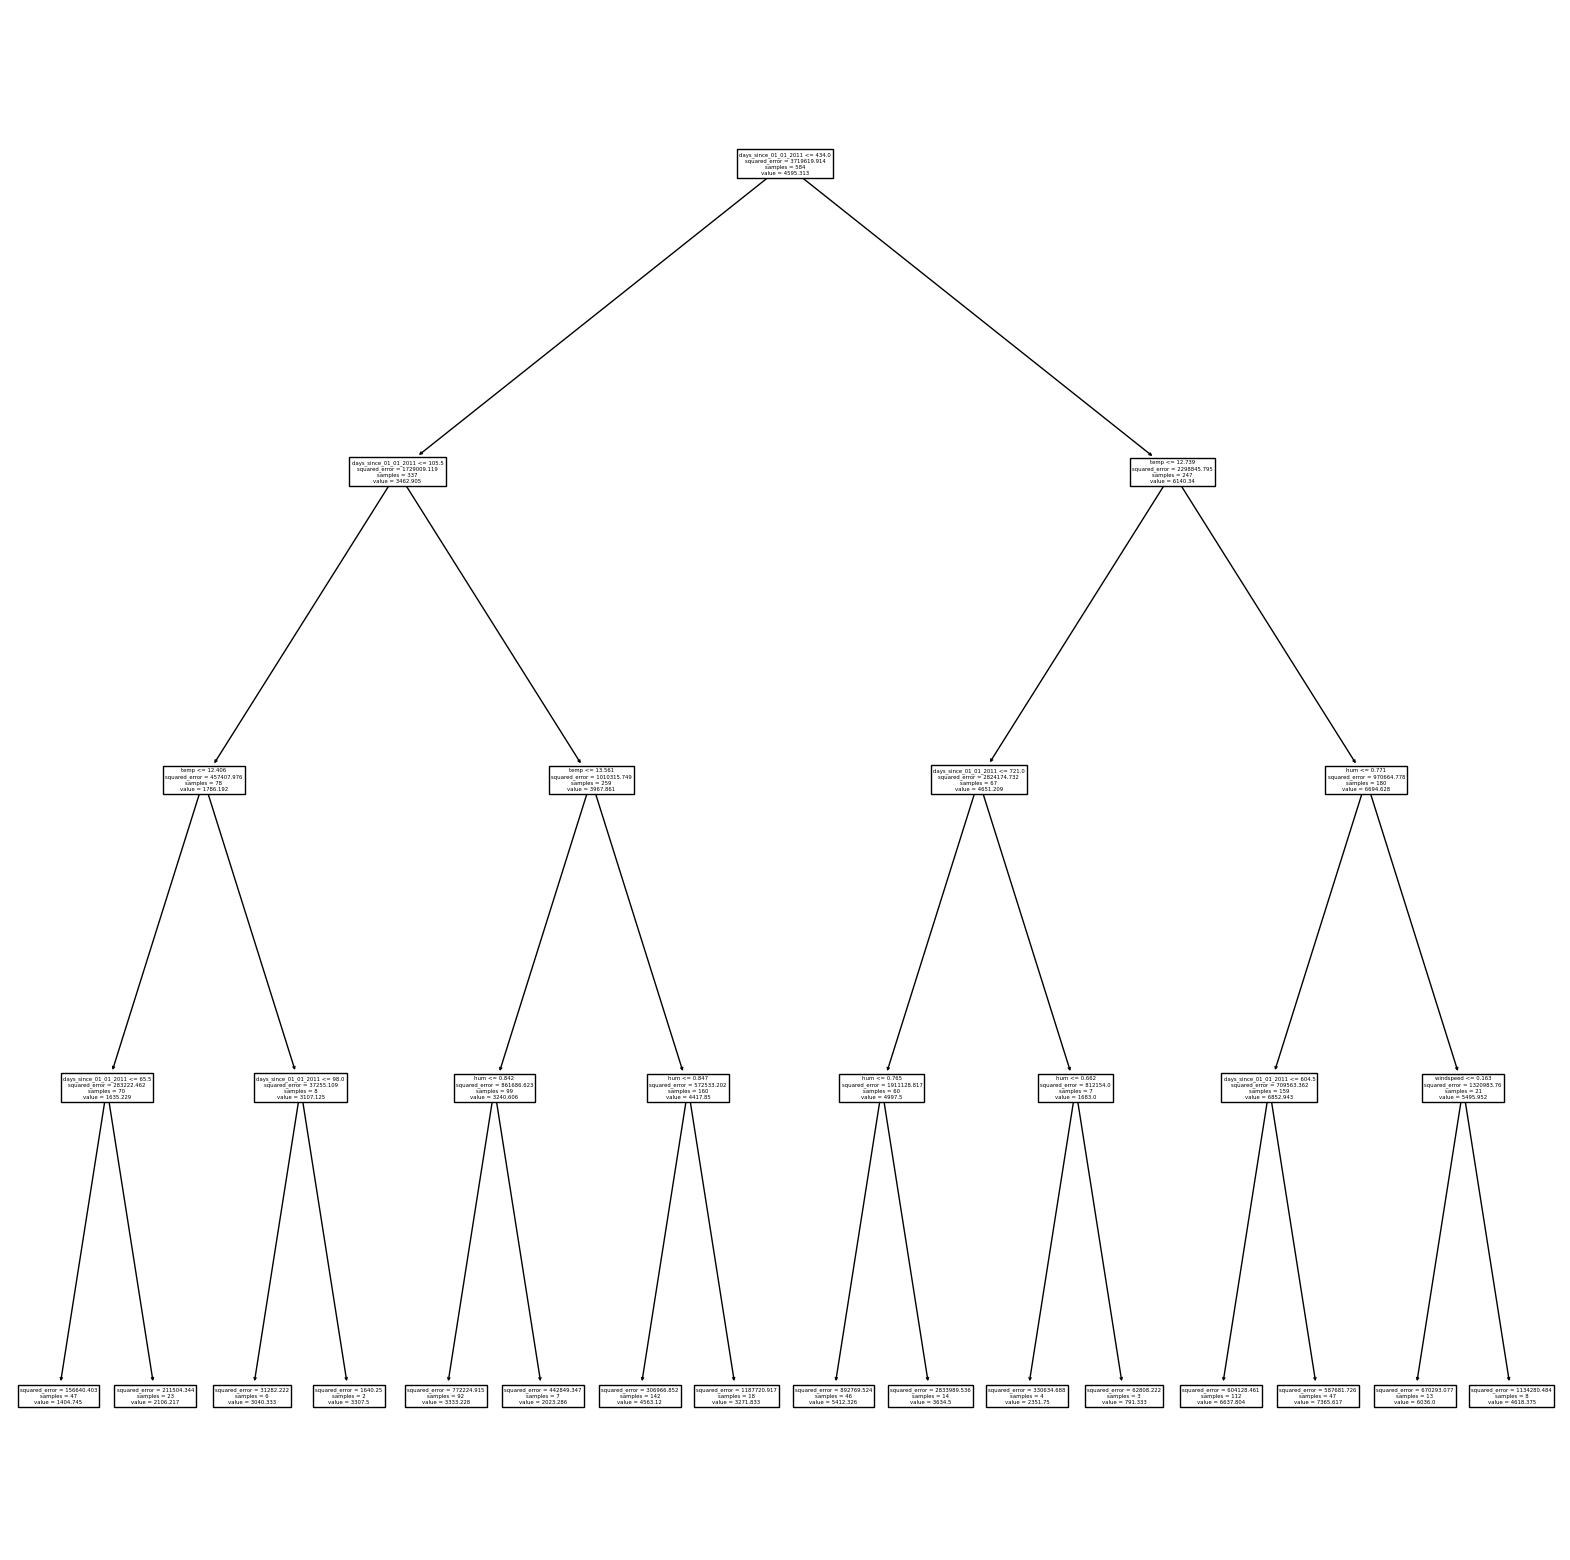

In [66]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20,20))
ax = plt.gca()
plot_tree(regr, ax=ax, feature_names=X_train.columns)
fig.savefig("tree.png", dpi=400)

### Tree’s Feature Importance from Mean Decrease in Impurity (MDI)

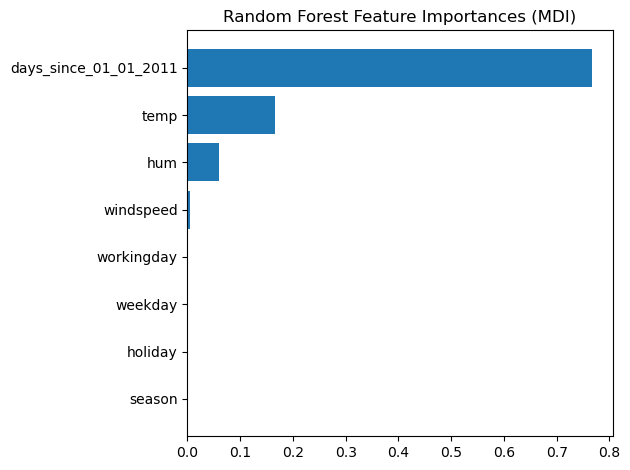

In [67]:
feature_names = X_train.columns

tree_feature_importances = regr.feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

### Exercise 2.4
In the above tree: Find the rule with the largest support (that is the leaf with most samples in it), and follow its path. How many samples are in it? Return that value

In [125]:
def ex_2_4() -> int:
    return 1

In [70]:
regr.tree_.children_left

array([ 1,  2,  3,  4, -1, -1,  7, -1, -1, 10, 11, -1, -1, 14, -1, -1, 17,
       18, 19, -1, -1, 22, -1, -1, 25, 26, -1, -1, 29, -1, -1],
      dtype=int64)

In [68]:
def ex_2_4() -> int:
    n_samples = regr.tree_.n_node_samples
    leaf_indices = np.where(regr.tree_.children_left == -1)[0]  # indices of leaf nodes
    leaf_samples = n_samples[leaf_indices]  # number of samples in each leaf
    max_samples = leaf_samples.max()  # maximum number of samples in a leaf
    return max_samples


In [69]:
compare("ex_2_4", ex_2_4)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


### Exercise 2.5
Write a function that as input takes `min_samples_leaf` and trains the `DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=1)` on the bike training data using `ex_2_3`. Return the r2-score on training- and validation-data as a tuple

In [127]:
def ex_2_5(min_samples_leaf) -> (float, float):
    X_train, y_train, X_val, y_val = ex_2_3()
    #TODO
    return 1.0, 0.9

In [71]:
from sklearn.metrics import r2_score

def ex_2_5(min_samples_leaf: int) -> (float, float):
    X_train, y_train, X_val, y_val = ex_2_3()
    
    regr = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=1)
    regr.fit(X_train, y_train)
    
    train_score = regr.score(X_train, y_train)
    val_score = regr.score(X_val, y_val)
    
    return train_score, val_score

In [72]:
compare("ex_2_5", ex_2_5)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


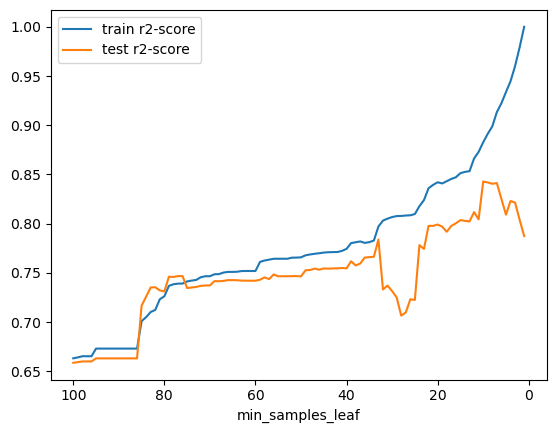

In [73]:
min_samples_leafs = range(1, 101)
train_r2, test_r2 = np.array(list(map(ex_2_5, min_samples_leafs))).transpose()
plt.plot(min_samples_leafs, train_r2, label="train r2-score")
plt.plot(min_samples_leafs, test_r2, label="test r2-score")
plt.xlabel("min_samples_leaf")
plt.gca().invert_xaxis()
plt.legend()

Q: Where is the optimal `min_samples_leaf` value?

### Exercise 2.6
Write a function that as input takes `min_samples_leaf` and trains the `DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=1)` on the bike training data with a random feature using `ex_2_3(True)`. Return the feature importance of the features: temp, hum, and the random feature

In [130]:
def ex_2_6(min_samples_leaf) -> (float, float, float):
    X_train, y_train, X_val, y_val = ex_2_3(True)
    #TODO
    return 0.3, 0.2, 0.1

In [81]:
def ex_2_6(min_samples_leaf: int) -> (float, float, float):
    X_train, y_train, X_val, y_val = ex_2_3(True)
    
    regr = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=1)
    regr.fit(X_train, y_train)
    
    # Get the names of the features from the DataFrame
    feature_names = X_train.columns

    # Get the importances of the features
    feature_importances = regr.feature_importances_

    # Find the indices of the 'temp', 'hum', and 'random_number' features
    temp_index = list(feature_names).index('temp')
    hum_index = list(feature_names).index('hum')
    random_number_index = list(feature_names).index('random_number(temp)')

    # Get the importances of these features
    temp_importance = feature_importances[temp_index]
    hum_importance = feature_importances[hum_index]
    random_number_importance = feature_importances[random_number_index]

    return temp_importance, hum_importance, random_number_importance


In [82]:
compare("ex_2_6", ex_2_6)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


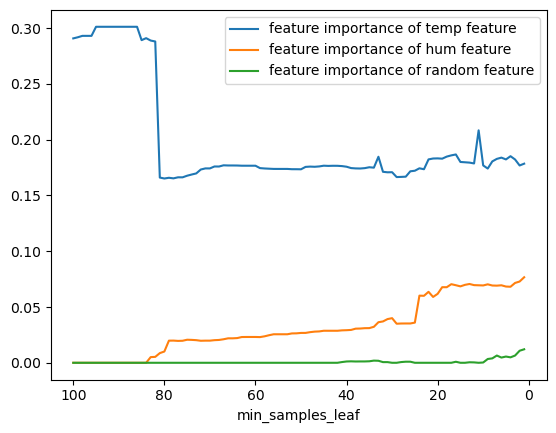

In [83]:
min_samples_leafs = range(1, 101)
ipts_temp, ipts_hum, ipts_randn = np.array(list(map(ex_2_6, min_samples_leafs))).transpose()
plt.plot(min_samples_leafs, ipts_temp, label="feature importance of temp feature")
plt.plot(min_samples_leafs, ipts_hum, label="feature importance of hum feature")
plt.plot(min_samples_leafs, ipts_randn, label="feature importance of random feature")
plt.xlabel("min_samples_leaf")
plt.gca().invert_xaxis()
plt.legend()
plt.show()

Q: Does the random feature gain importance?

## RuleFit
Extract rules using CART and add these rules as features, then use LASSO 

In [84]:
from imodels import RuleFitRegressor

In [85]:
X_train, y_train, X_val, y_val = ex_2_3()
regr = RuleFitRegressor(max_rules=20, tree_size=4, random_state=1) # max_rules=20, tree_size=4, random_state=1
regr.fit(X_train, y_train)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RuleFitRegressor(max_rules=20, random_state=1)

In [86]:
regr.score(X_train, y_train)

0.7425312702484042

In [87]:
regr.score(X_val, y_val)

0.7237159472197946

In [88]:
regr.intercept

4324.667133250576

In [93]:
df = regr.visualize()

In [94]:
df

rule  \
17                                                                            temp <= 14.14875   
15                                                                            temp <= 13.79625   
18                            days_since_01_01_2011 <= 718.0 and days_since_01_01_2011 > 424.5   
16                                                                            temp <= 13.18917   
12                                                                            temp <= 12.77792   
24                                            days_since_01_01_2011 > 417.5 and temp > 8.69353   
19                         days_since_01_01_2011 > 438.0 and temp > 5.81816 and hum <= 0.82439   
14                                                                            temp <= 11.75958   
10                                                                            temp <= 11.68125   
20  days_since_01_01_2011 > 370.5 and temp > 7.66667 and hum <= 0.845 and windspeed <= 0.28824   
23                                           days_since_01_01_2011 > 429.5 and temp > 10.17335   
22                           days_since_01_01_2011 > 452.5 and season > 1.5 and hum <= 0.76542   
21                         days_since_01_01_2011 > 432.0 and temp > 7.15919 and hum <= 0.74542   
13                                         days_since_01_01_2011 <= 408.0 and temp <= 13.56125   
9                                                           season <= 3.0 and temp <= 12.31218   
8                                          days_since_01_01_2011 <= 388.0 and temp <= 12.87585   
11                                         days_since_01_01_2011 <= 368.5 and temp <= 12.85625   

      coef  
17 -143.48  
15 -197.35  
18  154.01  
16   -7.97  
12 -130.40  
24  122.07  
19  784.99  
14 -115.73  
10  -31.19  
20  439.18  
23  101.47  
22  271.47  
21  179.38  
13 -153.26  
9  -516.60  
8   -73.60  
11 -105.81

### Exercise 2.7
Find the rule with the highest support, what is the rule?. Write a function that return this Rule object

In [121]:
from imodels.util.rule import Rule

def ex_2_7() -> Rule:
    # Get the dataframe of rules and coefficients
    df = regr._get_rules()[8:]
    # Reset the index of the DataFrame
    df = df.reset_index(drop=True)
    # Find the index of the maximum coefficient
    max_coef_index = df['support'].idxmax()
    # Return the corresponding rule
    return regr.rules_[max_coef_index]

compare("ex_2_7", ex_2_7)


/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


In [96]:
from imodels.util.rule import Rule

def ex_2_7() -> Rule:
    X_train, y_train, X_val, y_val = ex_2_3()
    regr = RuleFitRegressor(max_rules=20, tree_size=4, random_state=1)
    regr.fit(X_train, y_train)
    
    # Initialize highest support and rule
    max_support = 0
    max_rule = None

    # Iterate over rules
    for rule in regr.rules_:
        # Calculate support for current rule
        support = np.mean(rule.eval(X_train))
        # If current rule support is higher than max_support, update max_support and max_rule
        if support > max_support:
            max_support = support
            max_rule = rule

    return max_rule


In [119]:
regr._get_rules()[8:]

rule  \
8                                          days_since_01_01_2011 <= 388.0 and temp <= 12.87585   
9                                                           season <= 3.0 and temp <= 12.31218   
10                                                                            temp <= 11.68125   
11                                         days_since_01_01_2011 <= 368.5 and temp <= 12.85625   
12                                                                            temp <= 12.77792   
13                                         days_since_01_01_2011 <= 408.0 and temp <= 13.56125   
14                                                                            temp <= 11.75958   
15                                                                            temp <= 13.79625   
16                                                                            temp <= 13.18917   
17                                                                            temp <= 14.14875   
18                            days_since_01_01_2011 <= 718.0 and days_since_01_01_2011 > 424.5   
19                         days_since_01_01_2011 > 438.0 and temp > 5.81816 and hum <= 0.82439   
20  days_since_01_01_2011 > 370.5 and temp > 7.66667 and hum <= 0.845 and windspeed <= 0.28824   
21                         days_since_01_01_2011 > 432.0 and temp > 7.15919 and hum <= 0.74542   
22                           days_since_01_01_2011 > 452.5 and season > 1.5 and hum <= 0.76542   
23                                           days_since_01_01_2011 > 429.5 and temp > 10.17335   
24                                            days_since_01_01_2011 > 417.5 and temp > 8.69353   

    type        coef   support  importance  
8   rule  -73.604759  0.238014   31.345879  
9   rule -516.595013  0.250000  223.692202  
10  rule  -31.186536  0.357877   14.950064  
11  rule -105.812495  0.207192   42.885185  
12  rule -130.401843  0.398973   63.856101  
13  rule -153.260436  0.265411   67.672419  
14  rule -115.732587  0.357877   55.479379  
15  rule -197.352895  0.431507   97.746219  
16  rule   -7.970061  0.407534    3.916294  
17  rule -143.476342  0.446918   71.332749  
18  rule  154.013628  0.417808   75.959251  
19  rule  784.986363  0.369863  378.965827  
20  rule  439.180229  0.351027  209.616985  
21  rule  179.376375  0.320205   83.689014  
22  rule  271.474489  0.330479  127.697740  
23  rule  101.469476  0.347603   48.320684  
24  rule  122.065178  0.375000   59.094550

In [99]:
compare("ex_2_7", ex_2_7)

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The provided function `<function ex_2_7 at 0x13e74f1f0>` does either not take the required inputs OR does not produce the right outputs OR your environment does not have all files/packages in order..


### Exercise 2.8
Write a function that takes the name of the feature variable `feature_key` and one specific value for that feature `feature_value`. It should return the number of rented bikes of the average training sample but with the one feature `feature_key` set to the specified `feature_value`. Use the RuleFitRegressor as it is defined above

In [141]:
def ex_2_8(feature_key, feature_value) -> np.array:
    X_average = X_train.mean()
    #TODO
    
    return np.array([2500])

In [125]:
def ex_2_8(feature_key, feature_value) -> np.array:
    X_average = X_train.mean()
    X_average[feature_key] = feature_value
    return regr.predict(X_average.values.reshape(1, -1))

compare("ex_2_8", ex_2_8)


/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


In [142]:
compare("ex_2_8", ex_2_8)

/opt/homebrew/Caskroom/miniforge/base/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Your function does interface but there is some mistake here in your function(/logic) .. 


In [126]:
def plot_ex_2_8(feature_key, feature_values):
    xs = feature_values
    ys = list(map(lambda x: ex_2_8(feature_key, x), xs))
    plt.plot(xs, ys)
    plt.xlabel(feature_key)
    plt.ylabel("cnt")

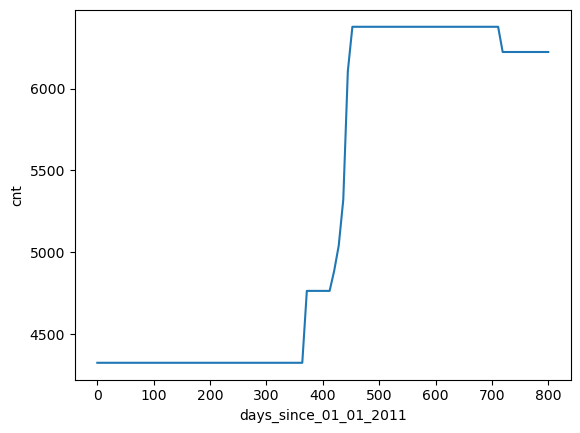

In [127]:
plot_ex_2_8("days_since_01_01_2011", np.linspace(0, 800, 100))
plt.show()

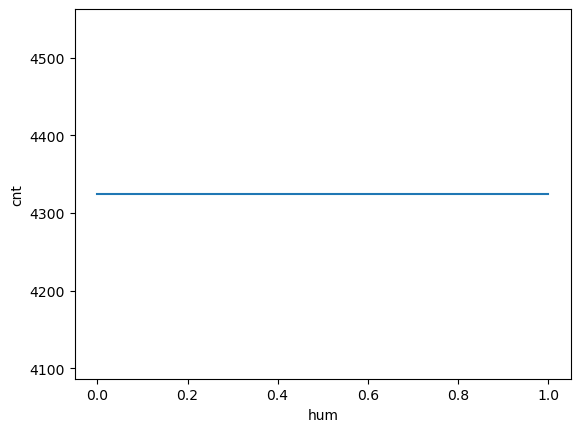

In [128]:
plot_ex_2_8("hum", np.linspace(0, 1, 100))
plt.show()

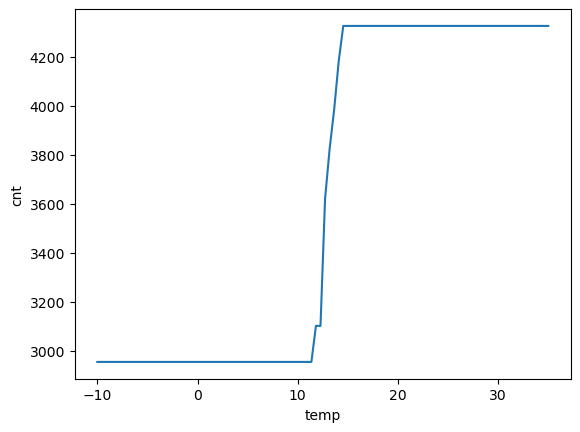

In [129]:
plot_ex_2_8("temp", np.linspace(-10, 35, 100))
plt.show()

Q: Is the Regressor stable around the mean training feature when varying e.g. the temperature?

Q: Would you have to check stability for linear/logistic regression?

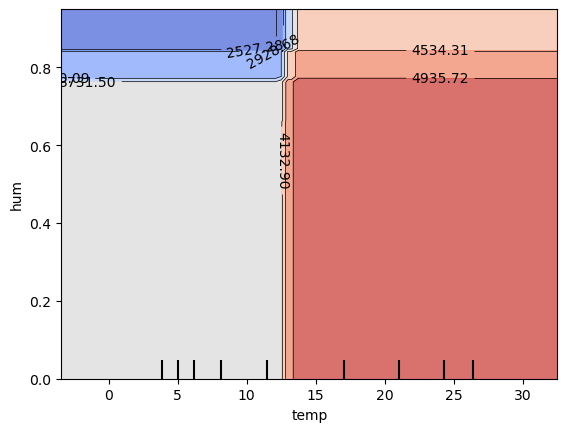

In [130]:
from sklearn.inspection import PartialDependenceDisplay

regr = DecisionTreeRegressor(max_depth=4, random_state=1) 
regr.fit(X_train, y_train)

PartialDependenceDisplay.from_estimator(regr, X_val, [("temp", "hum")], contour_kw=dict(cmap="coolwarm"), grid_resolution=1000)
plt.show()

In [131]:
#TODO: run this
write_submission_txt()

In [132]:
from ce2_compare import scores, grade
scores

{'ex_2_1': True,
 'ex_2_3': True,
 'ex_2_2': True,
 'ex_2_4': True,
 'ex_2_5': True,
 'ex_2_6': True,
 'ex_2_7': True,
 'ex_2_8': True}

In [133]:
# [0.0, 1.0]
grade("ce2_changhun_kim.txt")

'100.0% are correct'